userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0
2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0


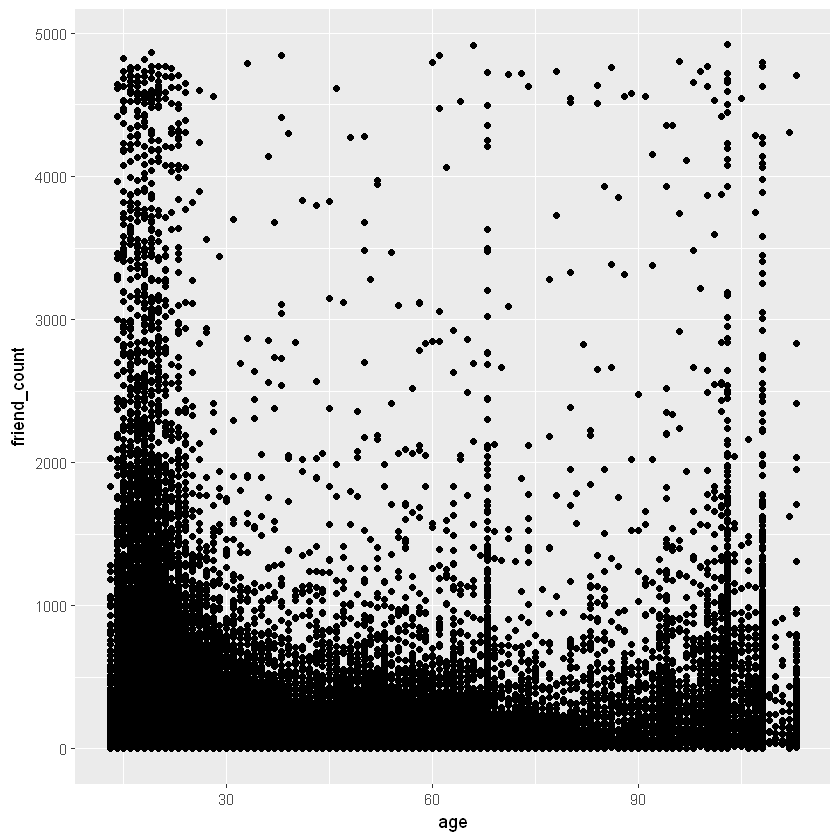

In [43]:
df = read.delim('pseudo_facebook.tsv')
head(df,3)

library(ggplot2)

## qplot() and ggplot() both are the functions defined in the ggplot2

qplot(x=age, y= friend_count, data=df)

# ggplot below does the same:
# ggplot(aes(x = age, y = friend_count), data = df) +
#   geom_point()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   20.00   28.00   37.28   50.00  113.00 

Warning message:
"Removed 4906 rows containing missing values (geom_point)."

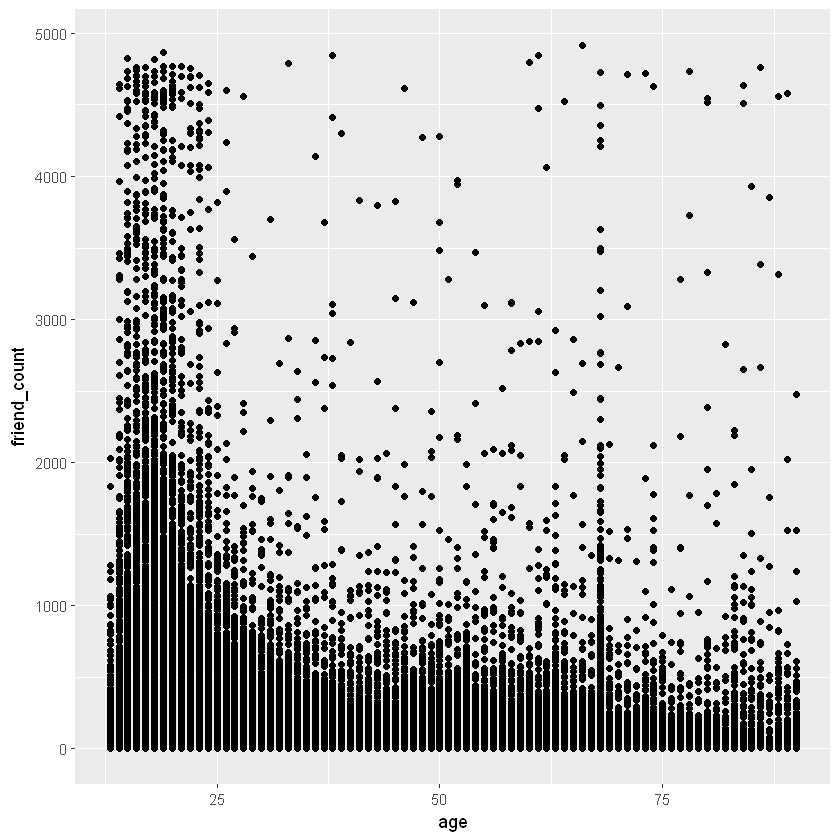

In [44]:
## Lets make some improvement to the scatter plot
# ?ggplot
## first lets explore age
summary(df$age)

ggplot(aes(x=age, y=friend_count), data=df) + 
    geom_point() +
        xlim(13,90)

Warning message:
"Removed 4906 rows containing missing values (geom_point)."

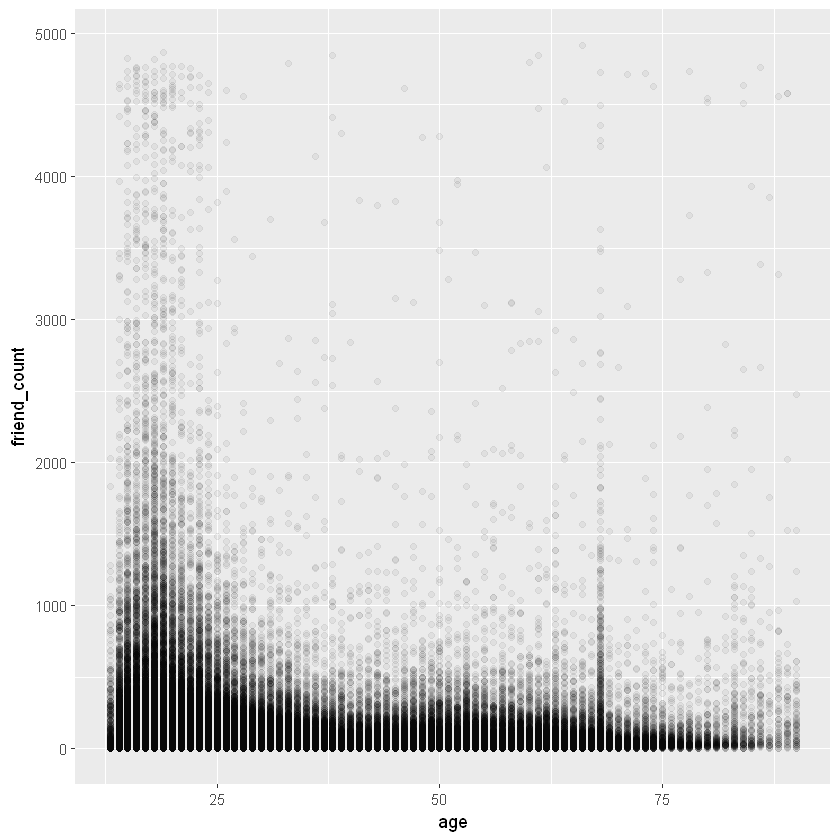

In [45]:
### Overplotting:

## When many points lie over the other, it is diificult
## to say how many points share the same, x and y coord

## So introducing transparency in geom_point, using alpha, may help; 
## alpha = 20, means it takes 20 points to look a dot completely dark
ggplot(aes(x=age, y=friend_count), data=df) + 
    geom_point(alpha=1/20) +
        xlim(13,90)


Warning message:
"Removed 5163 rows containing missing values (geom_point)."

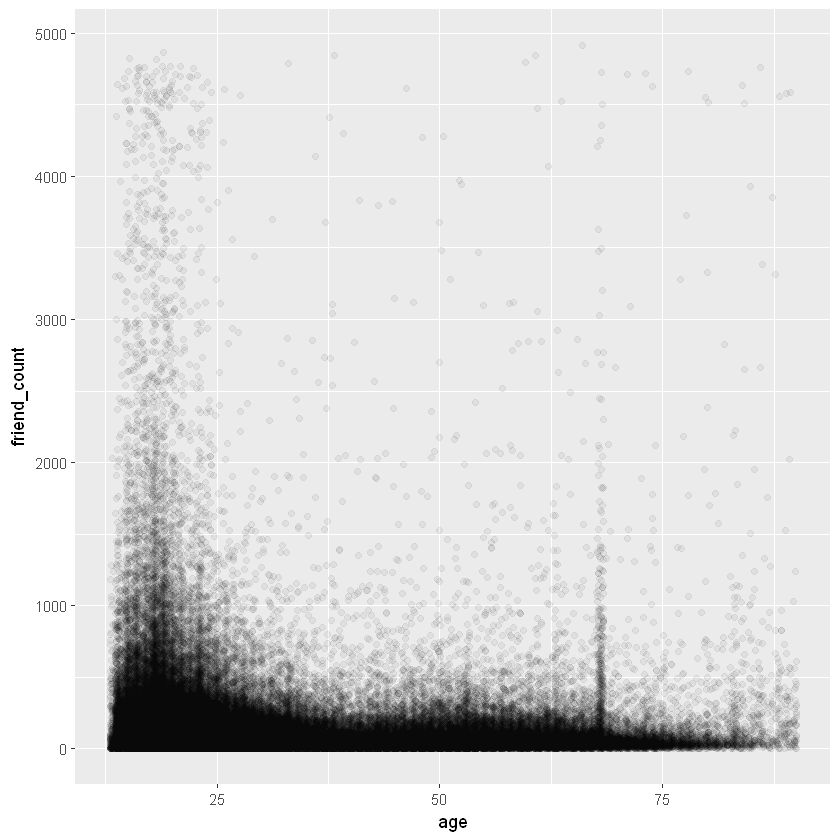

In [46]:
## geom_jitter() lets x take non-integral value
ggplot(aes(x=age, y=friend_count), data=df) + 
    geom_jitter(alpha=1/20) +
        xlim(13,90)


Warning message:
"Removed 5175 rows containing missing values (geom_point)."

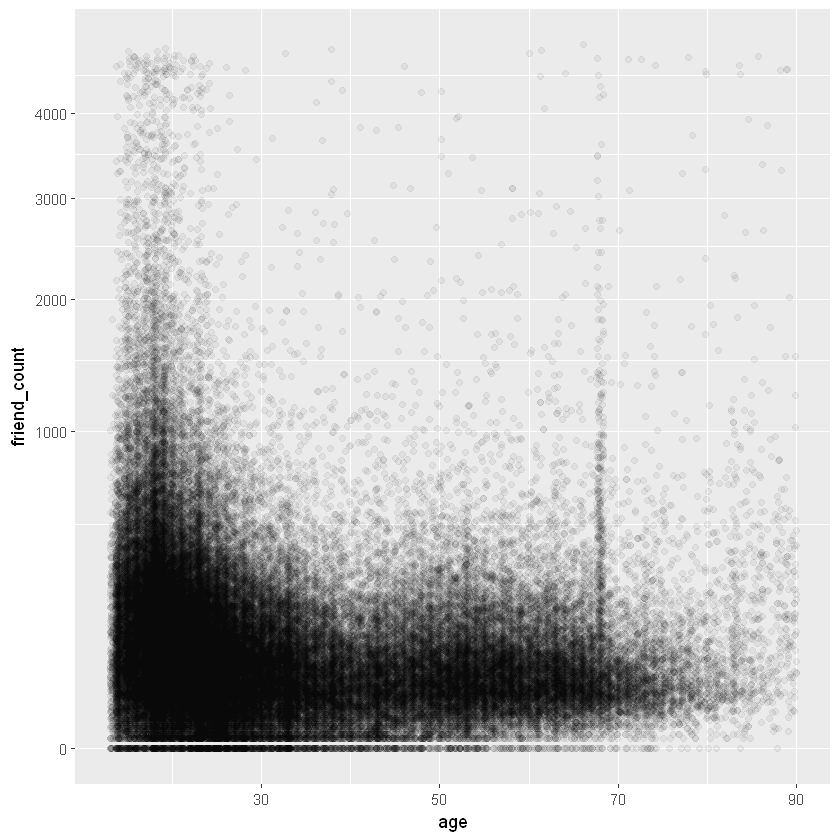

In [47]:
## lets do some transformation along the y axis (friend count):
# ?coord_trans
## We  don't use geom_jitter(), but geom_point()
## but we added one more argument in geom_point()
ggplot(aes(x=age, y=friend_count), data=df) + 
    geom_point(alpha=1/20, position = position_jitter(h=0)) + 
## h=0, bcoz some1 may have no friend and it will throw -ve frnd cnt
## notice a separate line along the x-axis
        xlim(13,90) +
            coord_trans(y = "sqrt")

## We can see that dots are more extended towards the y axis.

Warning message:
"Removed 5192 rows containing missing values (geom_point)."

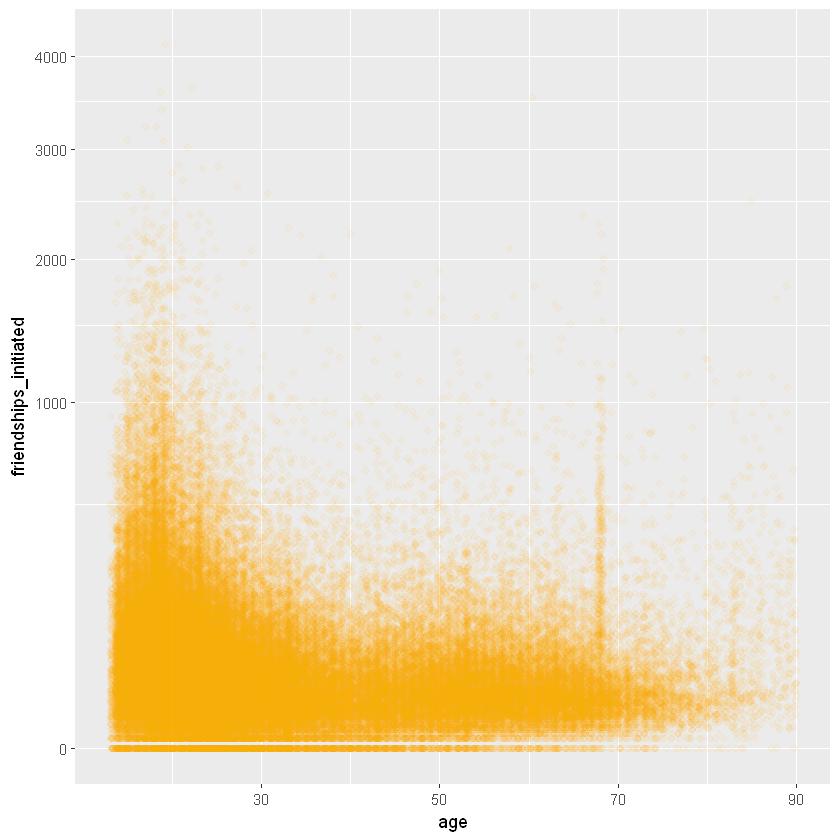

In [48]:
ggplot(aes(x=age, y=friendships_initiated), data=df) + 
    geom_point(alpha=1/20, position = position_jitter(h=0), color='orange') + 
        xlim(13,90) +
            coord_trans(y = "sqrt")

## This plot and the plot above is almost identical

In [70]:
## Conditional means:

## Scatter plot may not always be useful to see how does the
# mean/median of a variable varies with the other variable

# eg... how does avg friend_count varies with age??

## we need to find mean and median friend_count for each age

## dplyr is a very useful tool to arrange the data of a given
## table/dataframe to help us analyse the variables
## create new variables for analyses

library(dplyr)

# age_groups = group_by(df, age)
# df.friend_count_age = summarise(age_groups,
#                      friend_count_mean = mean(friend_count),
#                      friend_count_median = median(friend_count),
#                       n=n())
# ## n=n() is for counting and can only be used in summarise()

# head(df.friend_count_age)

# ## An alternate way of doing the same

df.friend_count_age = df %>%
    group_by(age) %>%
    summarise(friend_count_mean = mean(friend_count),
              friend_count_median = median(friend_count),
              n=n()) %>%
    arrange(age)

head(df.friend_count_age)



age,friend_count_mean,friend_count_median,n
13,164.7500,74.0,484
14,251.3901,132.0,1925
15,347.6921,161.0,2618
16,351.9371,171.5,3086
17,350.3006,156.0,3283
18,331.1663,162.0,5196


Warning message:
"Removed 23 rows containing missing values (geom_point)."

Warning message:
"Removed 23 rows containing missing values (geom_path)."

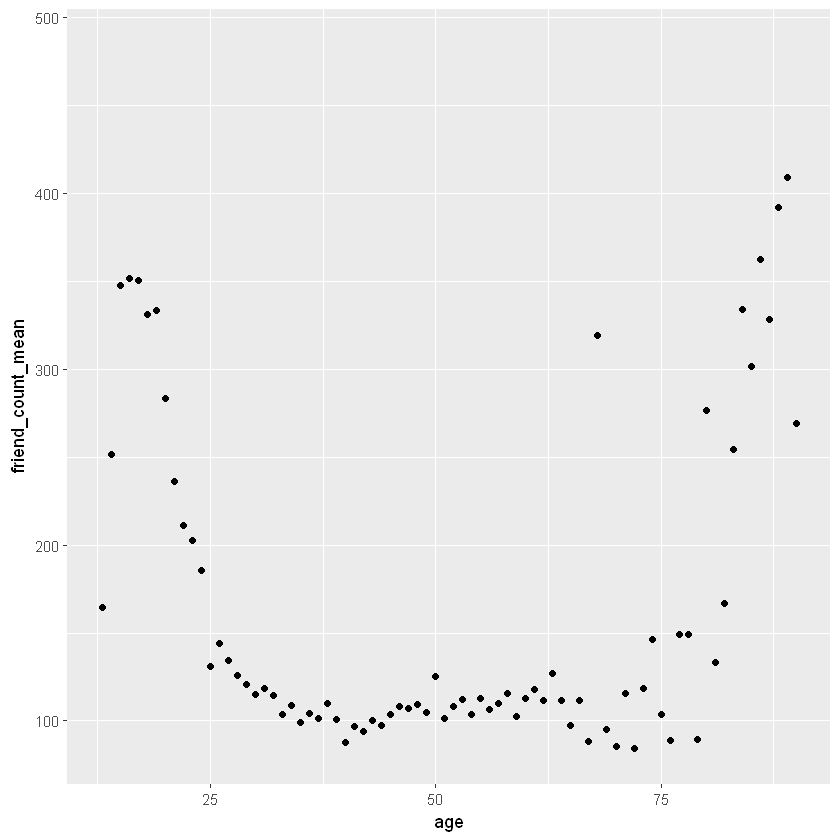

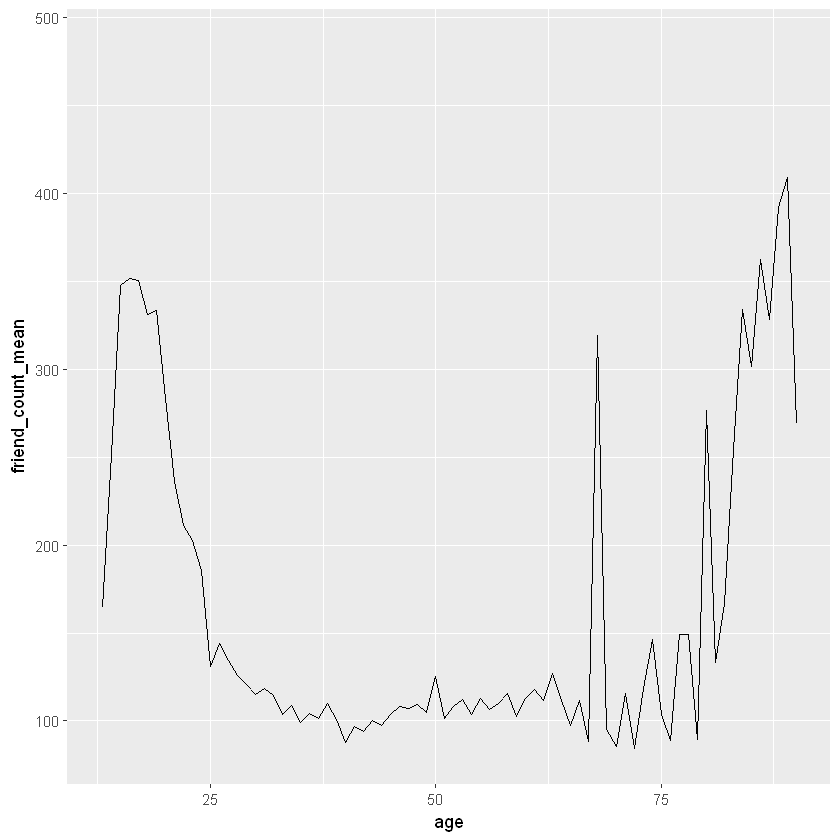

In [50]:
ggplot(aes(x=age, y=friend_count_mean), data=df.friend_count_age) + 
    geom_point() + 
        xlim(13,90)

ggplot(aes(x=age, y=friend_count_mean), data=df.friend_count_age) + 
    geom_line() + 
        xlim(13,90)

Warning message:
"Removed 4906 rows containing non-finite values (stat_summary)."Warning message:
"Removed 4906 rows containing non-finite values (stat_summary)."Warning message:
"Removed 4906 rows containing non-finite values (stat_summary)."Warning message:
"Removed 4906 rows containing non-finite values (stat_summary)."Warning message:
"Removed 5197 rows containing missing values (geom_point)."

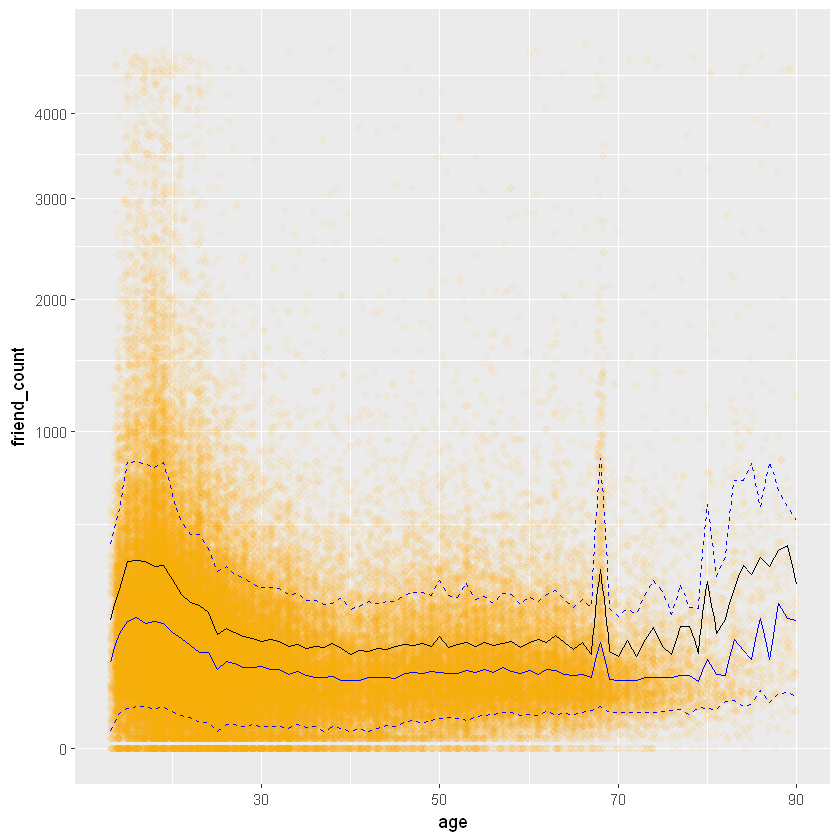

In [51]:
## Mean friend count has high variability in the higher ages
## further, age 69 seems to have abnormally high mean of friend count

ggplot(aes(x=age, y=friend_count), data=df) + 
    geom_point(alpha=1/20, position = position_jitter(h=0), color='orange') + 
    xlim(13,90) +
    coord_trans(y = "sqrt") +
    geom_line(stat = 'summary', fun.y=mean) +
    geom_line(stat = 'summary', fun.y=quantile, fun.args = list(probs = .1),
             linetype = 2, color = 'blue') +
    geom_line(stat = 'summary', fun.y=quantile, fun.args = list(probs = .5),
             color = 'blue') +
    geom_line(stat = 'summary', fun.y=quantile, fun.args = list(probs = .9),
             linetype = 2, color = 'blue') 

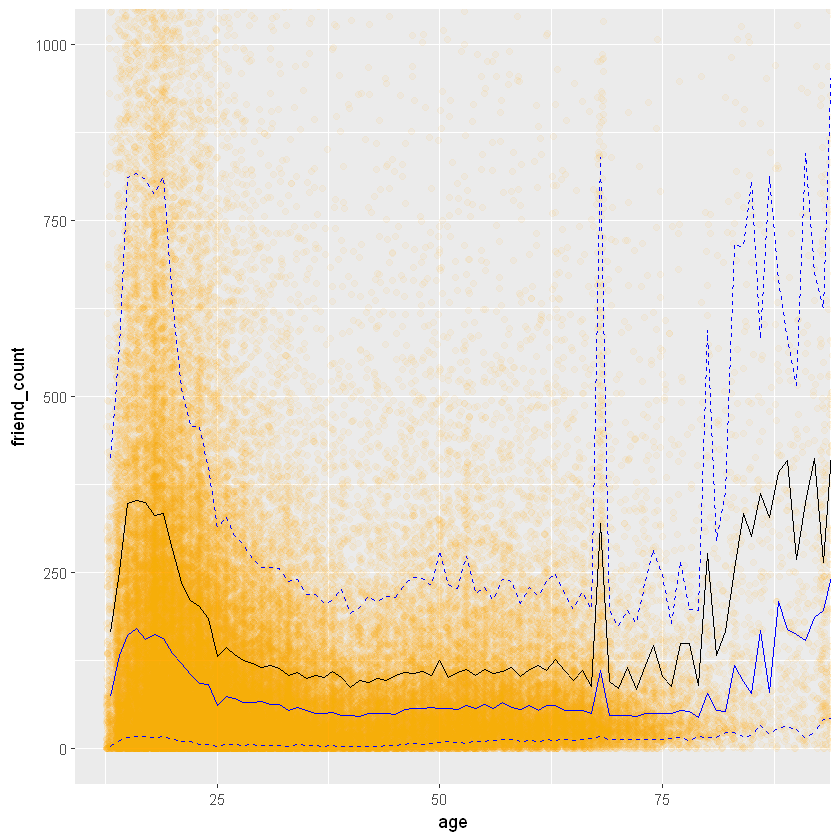

In [52]:
## lets zoomin to the interesting part of the plot
## using coord_cartesian instead of xlim
## and get rid of coord_trans()


ggplot(aes(x=age, y=friend_count), data=df) + 
    geom_point(alpha=1/20, position = position_jitter(h=0), color='orange') + 
    coord_cartesian( xlim = c(13,90), ylim = c(0,1000)) +
    geom_line(stat = 'summary', fun.y=mean) +
    geom_line(stat = 'summary', fun.y=quantile, fun.args = list(probs = .1),
             linetype = 2, color = 'blue') +
    geom_line(stat = 'summary', fun.y=quantile, fun.args = list(probs = .5),
             color = 'blue') +
    geom_line(stat = 'summary', fun.y=quantile, fun.args = list(probs = .9),
             linetype = 2, color = 'blue') 

## We can see for the age group 30-60, the mean friend count fall below 250
## for 90% of the people

In [53]:
### Instead of 4 superimposed graphs, lets use a mathematical quantity 
## to summarise the relationship b/n friend count and age

## We want the strength as well direction of the relationship

r = cov(df$friend_count, df$age)/(sd(df$friend_count)*sd(df$age))
r

[1] -0.02740737

In [54]:
# ?cor.test

cor.test(df$friend_count, df$age, method = 'pearson')
### There is no meaningful corelation

# r>0.3 or r< -0.3, the relationship is meaningful, but small
# r>0.7 is large
# BUT CORELATION IS NOT CAUSATION!!! 
## ONLY INFERENTIAL STATISTICS (NOT DESCRIPTIVE STATS) CAN 
## ESTABLISH A CAUSATION

## alternate:

# with(df, cor.test(friend_count, age, method = 'pearson'))


	Pearson's product-moment correlation

data:  df$friend_count and df$age
t = -8.6268, df = 99001, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03363072 -0.02118189
sample estimates:
        cor 
-0.02740737 


In [55]:
### Corelation on subsets:

## Relation b/n friend count and age is not monotonic

## Lets ignore the older ages that might be incorrect
## for only age less than 70

# df1 = subset(df, age<=70)
df1 = df[df$age<=70,]
with(df1, cor.test(friend_count, age, method = 'pearson'))

## As age increases friend count decreases
# BUT CORELATION IS NOT CAUSATION!!! 
## ONLY INFERENTIAL STATISTICS (NOT DESCRIPTIVE STATS) CAN 
## ESTABLISH A CAUSATION


	Pearson's product-moment correlation

data:  friend_count and age
t = -52.592, df = 91029, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1780220 -0.1654129
sample estimates:
       cor 
-0.1717245 


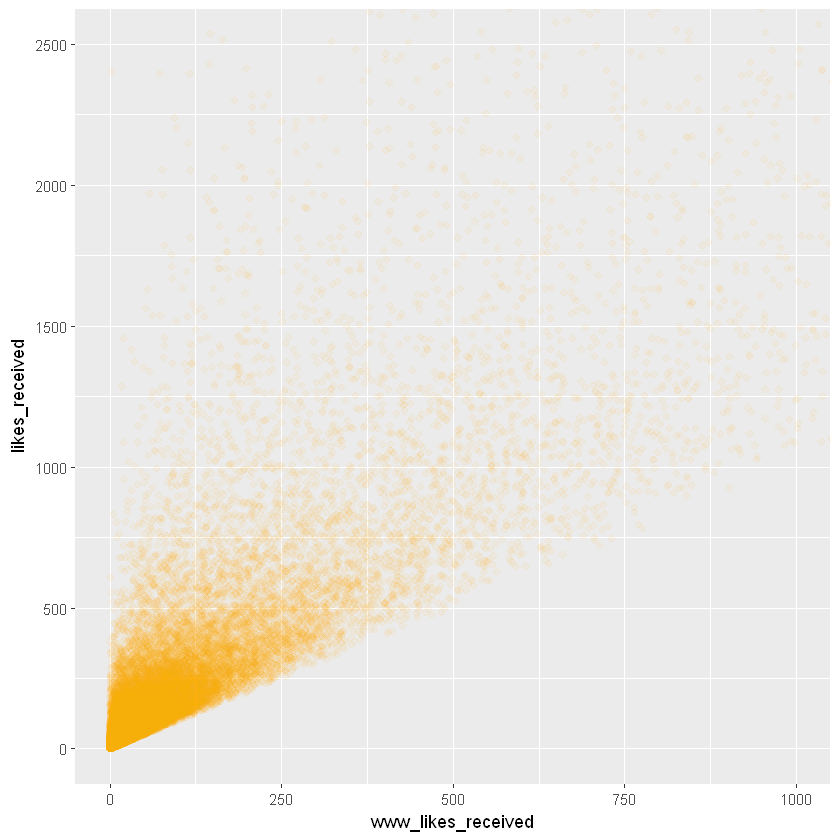

In [56]:
## Lets create scatter plot of apparently corelated variables

## "likes_received" vs "wwww_likes_received" (on desktop)

ggplot(aes(x=www_likes_received, y=likes_received), data=df) + 
    geom_point(alpha=1/20, position = position_jitter(h=0), color='orange') +
    coord_cartesian( xlim = c(0,1000), ylim = c(0,2500))

#     geom_point(alpha=1/20, position = position_jitter(h=0), color='orange') + 
#     coord_cartesian( xlim = c(0,15000), ylim = c(0,20000)) 
#     geom_line(stat = 'summary', fun.y=mean) +
#     geom_line(stat = 'summary', fun.y=quantile, fun.args = list(probs = .1),
#              linetype = 2, color = 'blue') +
#     geom_line(stat = 'summary', fun.y=quantile, fun.args = list(probs = .5),
#              color = 'blue') +
#     geom_line(stat = 'summary', fun.y=quantile, fun.args = list(probs = .9),
#              linetype = 2, color = 'blue') 




	Pearson's product-moment correlation

data:  www_likes_received and likes_received
t = 937.1, df = 99001, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9473553 0.9486176
sample estimates:
      cor 
0.9479902 


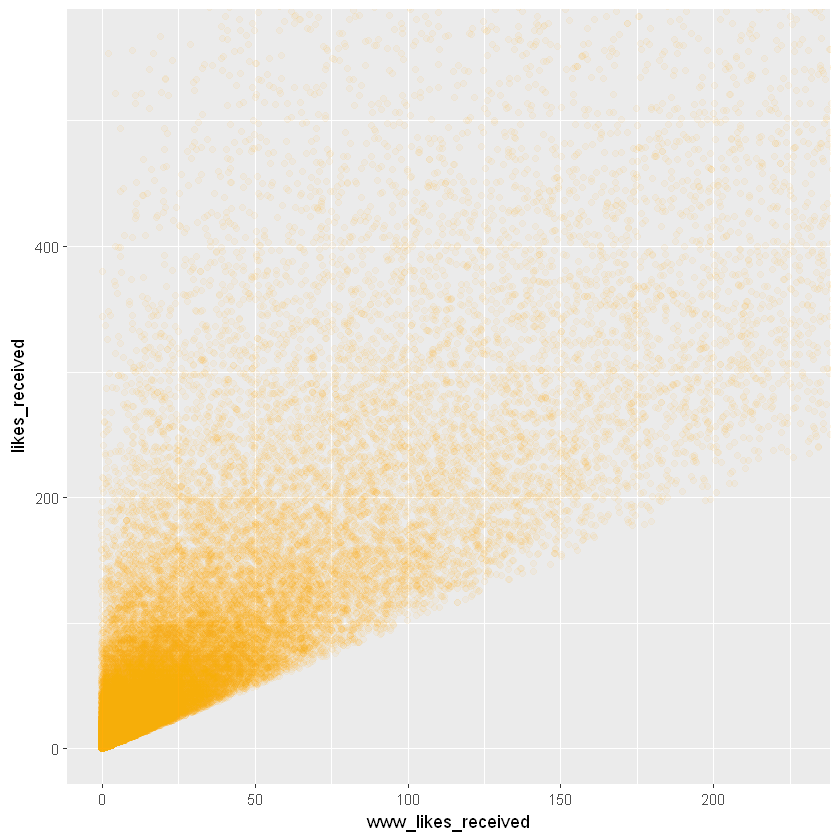

In [57]:
## to determine the right x, y limit, we will use the 95% percentile

ggplot(aes(x=www_likes_received, y=likes_received), data=df) + 
    geom_point(alpha=1/20, position = position_jitter(h=0), color='orange') +
    coord_cartesian( xlim = c(0, quantile(df$www_likes_received, 0.95)), 
                    ylim = c(0, quantile(df$likes_received, 0.95)))

## Mathematically 
with(df, cor.test(www_likes_received, likes_received, method = 'pearson'))

In [58]:
# ## A fundo method to install any package that is not in the r essentials
# ## just replace 'alr3' by the package name:

# ## here we want a dataset, Mitchell:

# install.packages('alr3', repos='http://cran.us.r-project.org')

Warning message:
"package 'alr3' is in use and will not be installed"

In [59]:
library(alr3)
data(Mitchell)
# ?Mitchell
head(Mitchell)
## This dataset will show, how corelation can be deceptive

Month,Temp
0,-5.18333
1,-1.65000
2,2.49444
3,10.40000
4,14.99440
5,21.71670



	Pearson's product-moment correlation

data:  Month and Temp
t = 0.81816, df = 202, p-value = 0.4142
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.08053637  0.19331562
sample estimates:
       cor 
0.05747063 


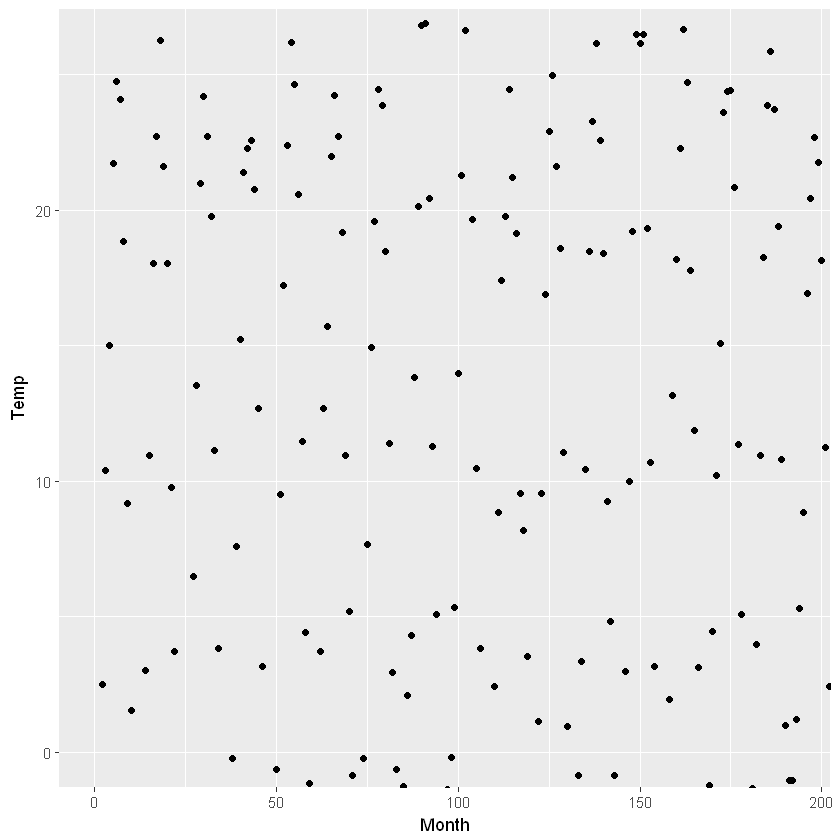

In [60]:
ggplot(aes(x=Month, y=Temp), data=Mitchell) + 
    geom_point() +
    coord_cartesian( xlim = c(0, quantile(Mitchell$Month, 0.95)), 
                    ylim = c(0, quantile(Mitchell$Temp, 0.95))) 
    

## Mathematically 
with(Mitchell, cor.test(Month, Temp, method = 'pearson'))

## i THINK MONTH ON THE X AXIS HAS BEEN COUNTED FROM THE BEGINNING
## not as the 12 months of a year

In [61]:
## How to make it better?

range(Mitchell$Month)

[1]   0 203

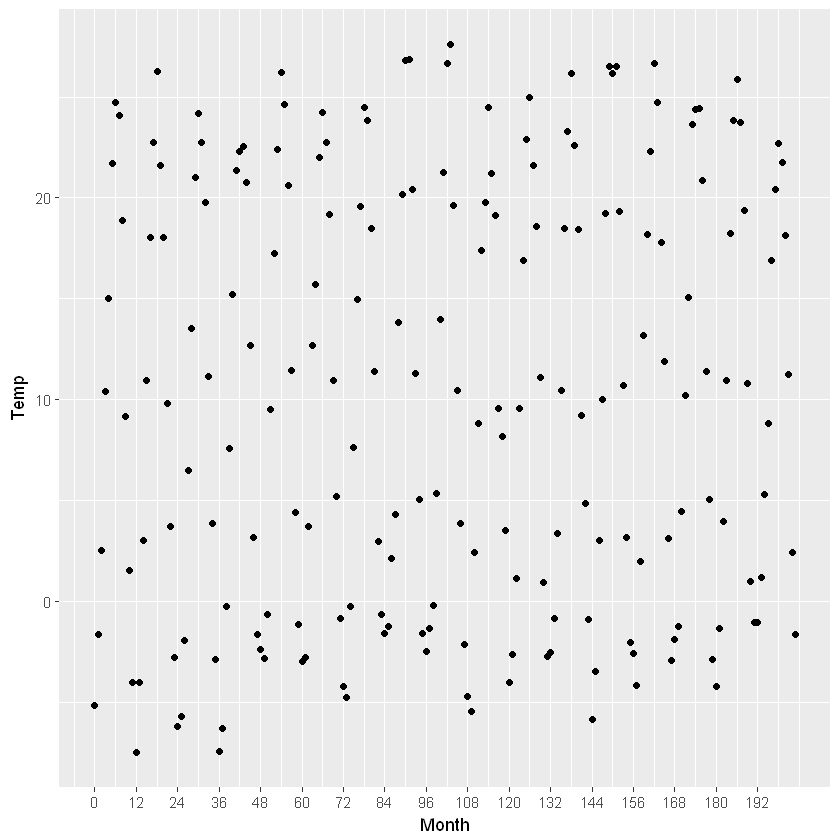

In [62]:
ggplot(aes(x=Month, y=Temp), data=Mitchell) + 
    geom_point() +
    scale_x_continuous(breaks = seq(0, 203, 12), limits = c(0, 203))

Warning message:
"Removed 155 rows containing missing values (geom_point)."

Warning message:
"Removed 155 rows containing missing values (geom_path)."

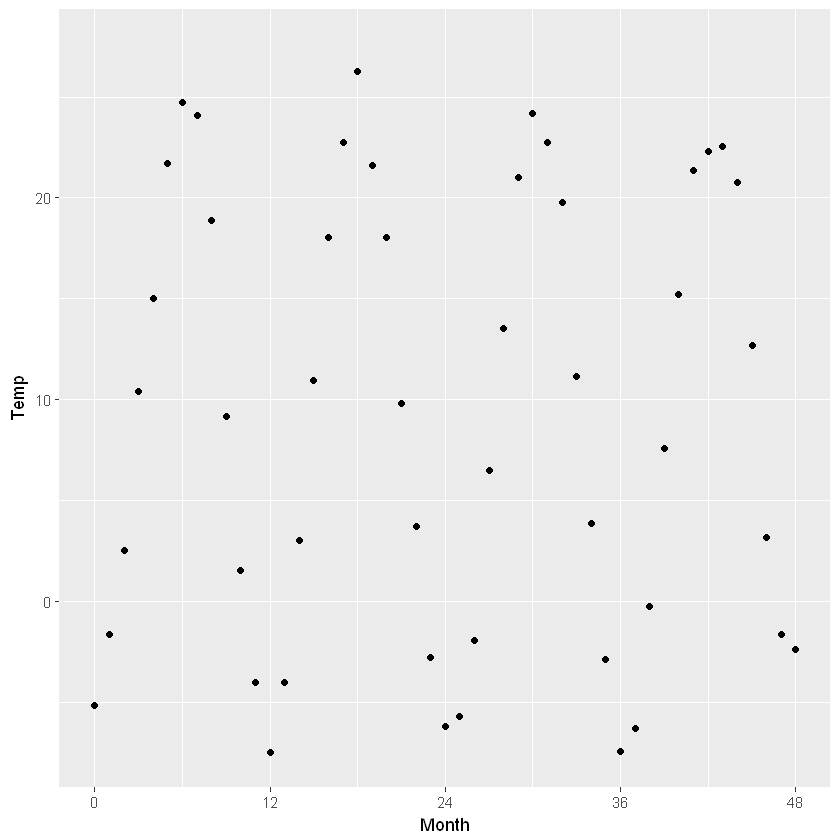

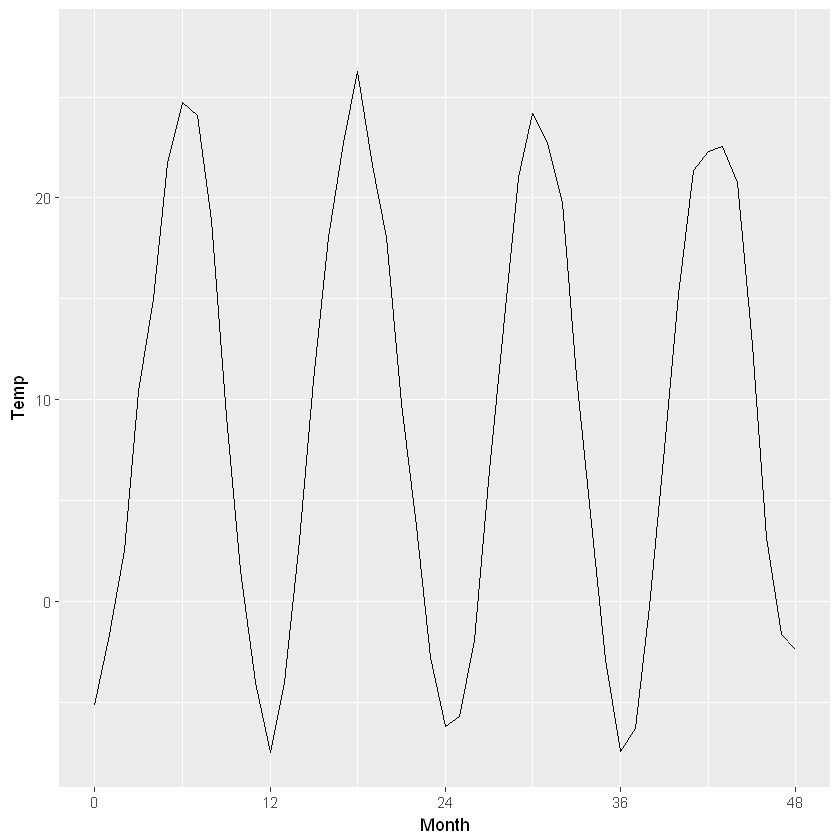

In [63]:
## Note cyclic pattern is not identified by the cor.test()

ggplot(aes(x=Month, y=Temp), data=Mitchell) + 
    geom_point() +
    scale_x_continuous(breaks = seq(0, 48, 12), limits = c(0, 48))

### It is almost cyclic, lets draw line instead of points

ggplot(aes(x=Month, y=Temp), data=Mitchell) + 
    geom_line() +
    scale_x_continuous(breaks = seq(0, 48, 12), limits = c(0, 48))

age_with_months,friend_count_mean,friend_count_median,n
13.16667,46.33333,30.5,6
13.25000,115.07143,23.5,14
13.33333,136.20000,44.0,25
13.41667,164.24242,72.0,33
13.50000,131.17778,66.0,45
13.58333,156.81481,64.0,54


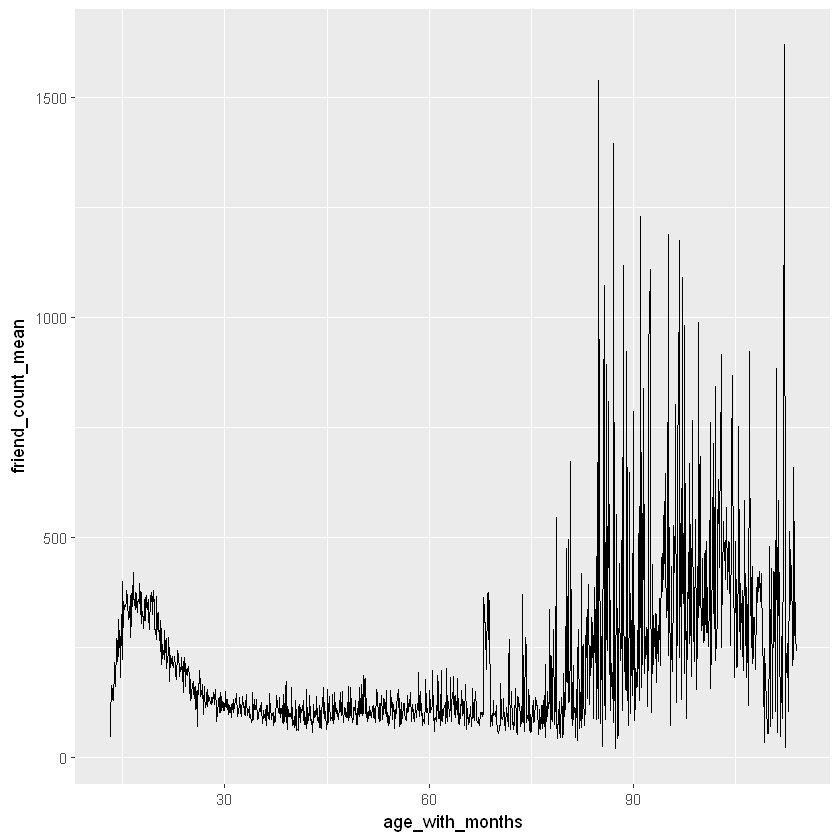

In [68]:
### Understanding noise:Age in year->Age in year w month (frac for month)

## # Assume the reference date for calculating age is December 31, 2013.

df$age_with_months = df$age + (12-df$dob_month)/12

df.friend_count_age_months = df %>%
    group_by(age_with_months) %>%
    summarise(friend_count_mean = mean(friend_count),
              friend_count_median = median(friend_count),
              n=n()) %>%
    arrange(age_with_months)

head(df.friend_count_age_months)

ggplot(aes(x=age_with_months, y=friend_count_mean), data=df.friend_count_age_months) + 
    geom_line()  
#         xlim(13,90)

age_with_months,friend_count_mean,friend_count_median,n
13.16667,46.33333,30.5,6
13.25000,115.07143,23.5,14
13.33333,136.20000,44.0,25
13.41667,164.24242,72.0,33
13.50000,131.17778,66.0,45
13.58333,156.81481,64.0,54


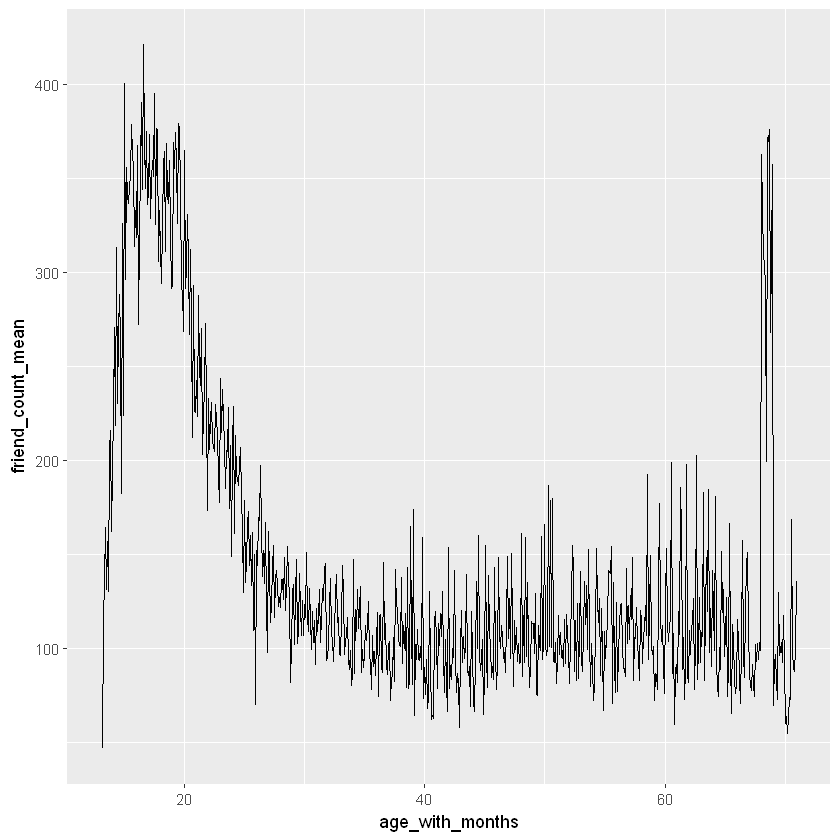

In [69]:
## We want age less than 71


df$age_with_months = df$age + (12-df$dob_month)/12

df.friend_count_age_months = df %>%
    group_by(age_with_months) %>%
    summarise(friend_count_mean = mean(friend_count),
              friend_count_median = median(friend_count),
              n=n()) %>%
    arrange(age_with_months)

head(df.friend_count_age_months)

ggplot(aes(x=age_with_months, y=friend_count_mean), 
       data=subset(df.friend_count_age_months, age_with_months<71)) + 
    geom_line()  

### This is a very noisy plot



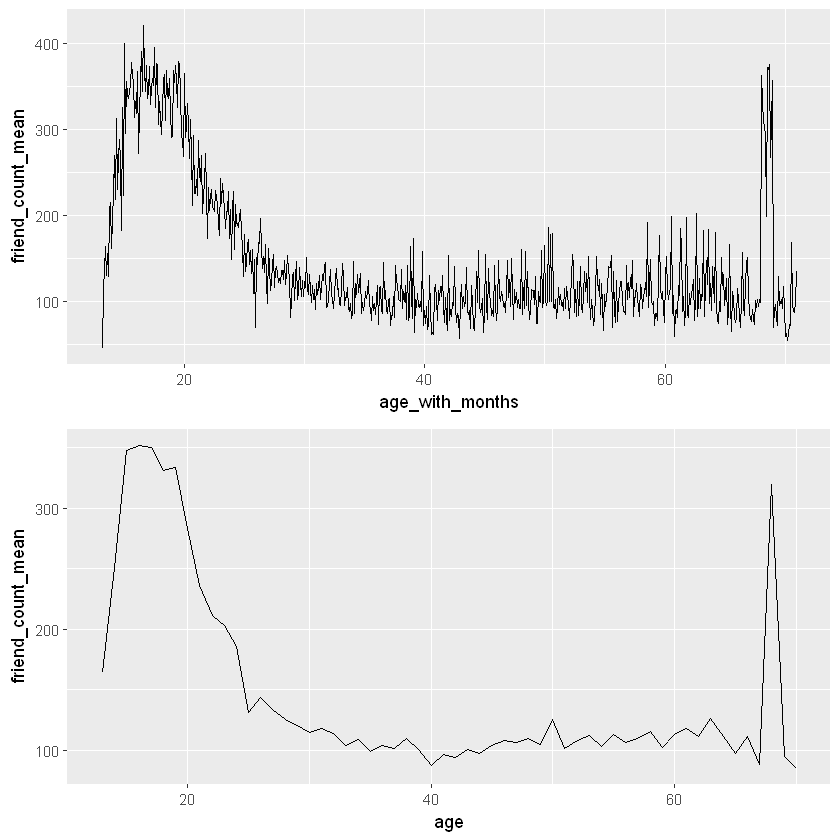

In [71]:
p1 = ggplot(aes(x=age_with_months, y=friend_count_mean), 
       data=subset(df.friend_count_age_months, age_with_months<71)) + 
    geom_line()  
## This plot has lots of noise 


p2 = ggplot(aes(x=age, y=friend_count_mean),
            data=subset(df.friend_count_age, age<71)) + 
    geom_line()  

library(gridExtra)
grid.arrange(p1, p2, ncol=1)

# Problem Set

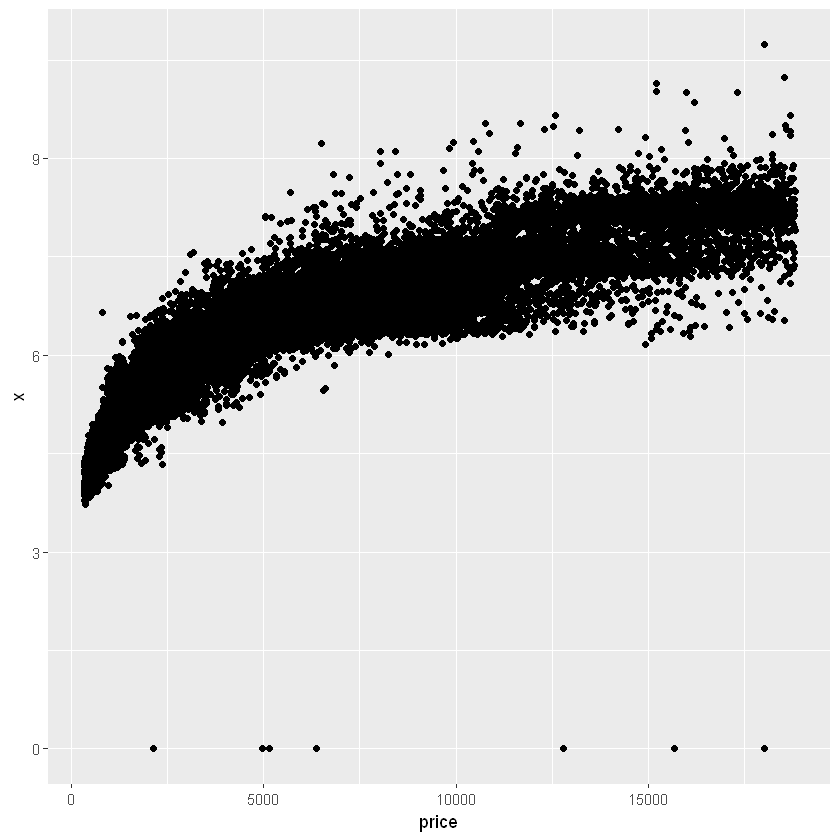

In [72]:
# In this problem set, you'll continue
# to explore the diamonds data set.

# Your first task is to create a
# scatterplot of price vs x.
# using the ggplot syntax.
ggplot(aes(x=price, y= x), data=diamonds )+
    geom_point()

In [102]:
head(diamonds)
summary(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z,volume
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,38.20203
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,34.50586
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,38.07688
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,46.72458
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,51.91725
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,38.69395


     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

In [76]:
### Corelations:

with(diamonds, cor.test(price, x, method='pearson'))
with(diamonds, cor.test(price, y, method='pearson'))
with(diamonds, cor.test(price, z, method='pearson'))


	Pearson's product-moment correlation

data:  price and x
t = 440.16, df = 53938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8825835 0.8862594
sample estimates:
      cor 
0.8844352 



	Pearson's product-moment correlation

data:  price and y
t = 401.14, df = 53938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8632867 0.8675241
sample estimates:
      cor 
0.8654209 



	Pearson's product-moment correlation

data:  price and z
t = 393.6, df = 53938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8590541 0.8634131
sample estimates:
      cor 
0.8612494 


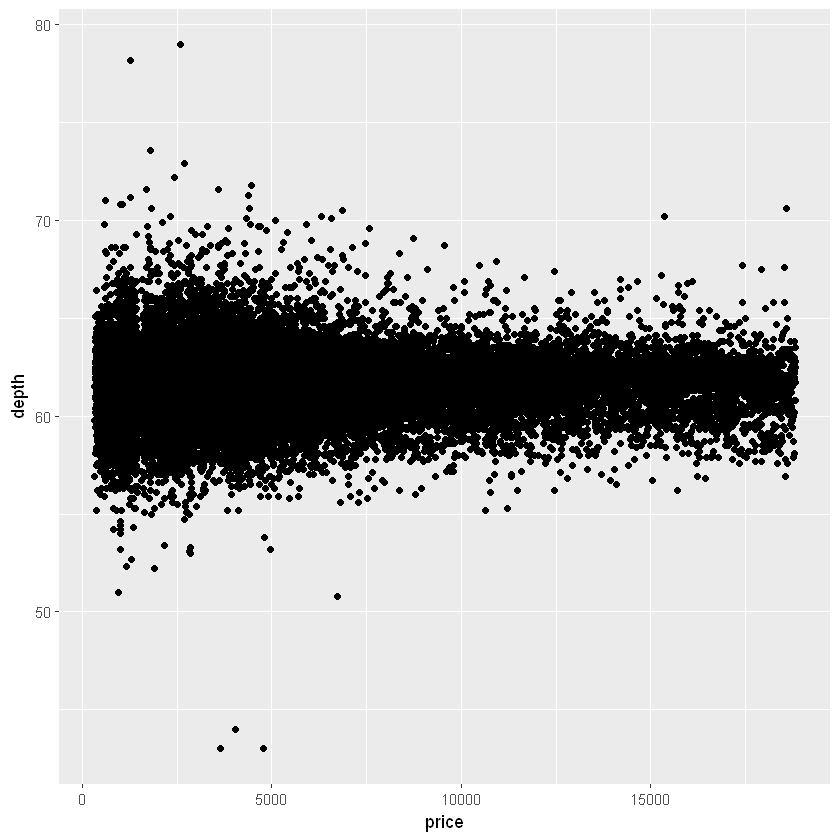

In [77]:
# Create a simple scatter plot of price vs depth.

ggplot(aes(x=price, y= depth), data=diamonds )+
    geom_point()

Warning message:
"Removed 1655 rows containing missing values (geom_point)."

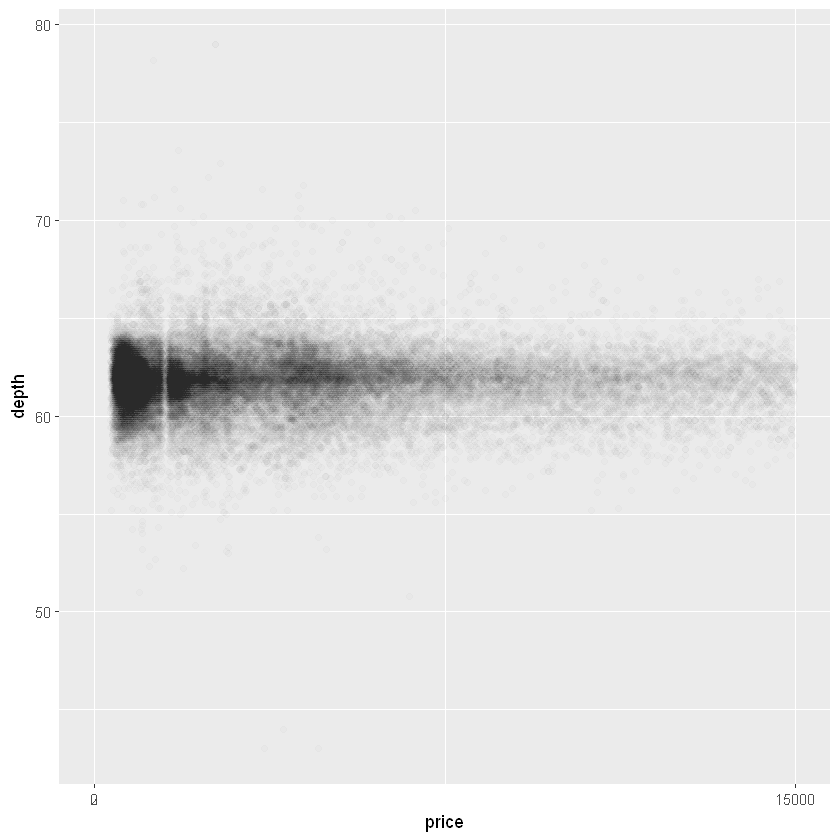

In [82]:
# Change the code to make the transparency of the
# points to be 1/100 of what they are now and mark
# the x-axis every 2 units.

ggplot(aes(x=price, y= depth), data=diamonds)+
    geom_point(alpha=0.01) +
    scale_x_continuous(limits = c(0, 15000), breaks = c(0, 15000, 2))

Warning message:
"Removed 3024 rows containing missing values (geom_point)."

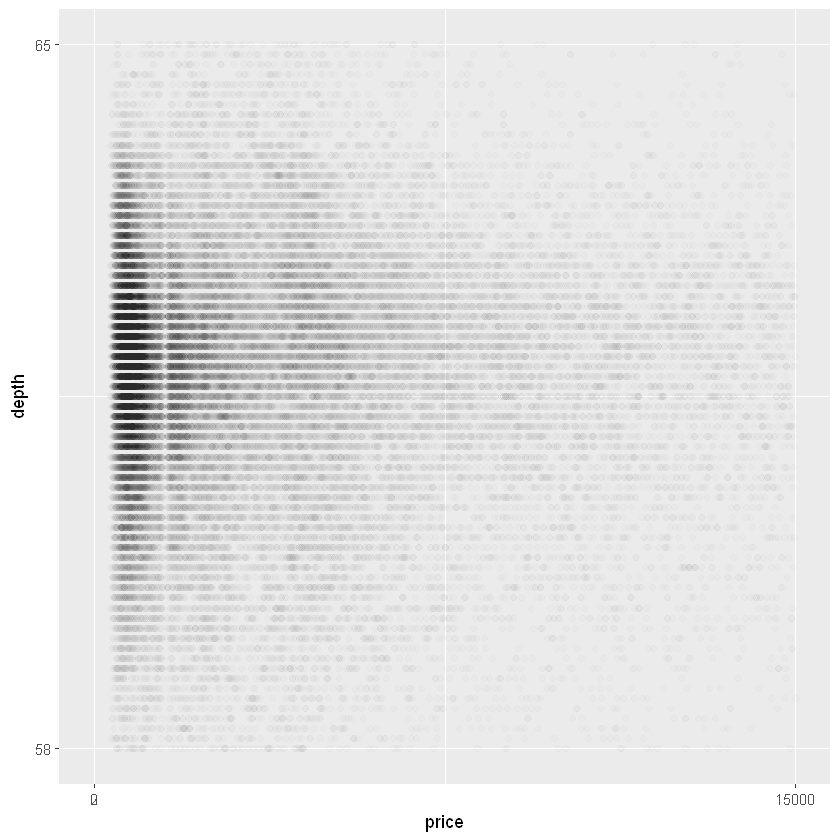

In [85]:
ggplot(aes(x=price, y= depth), data=diamonds)+
    geom_point(alpha=0.01) +
    scale_x_continuous(limits = c(0, 15000), breaks = c(0, 15000, 2))+
    scale_y_continuous(limits = c(58,65), breaks = c(58, 65, 1))


In [86]:
## Corelation b/n depth and price

with(diamonds, cor.test(price, depth, method='pearson'))


	Pearson's product-moment correlation

data:  price and depth
t = -2.473, df = 53938, p-value = 0.0134
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.019084756 -0.002208537
sample estimates:
       cor 
-0.0106474 


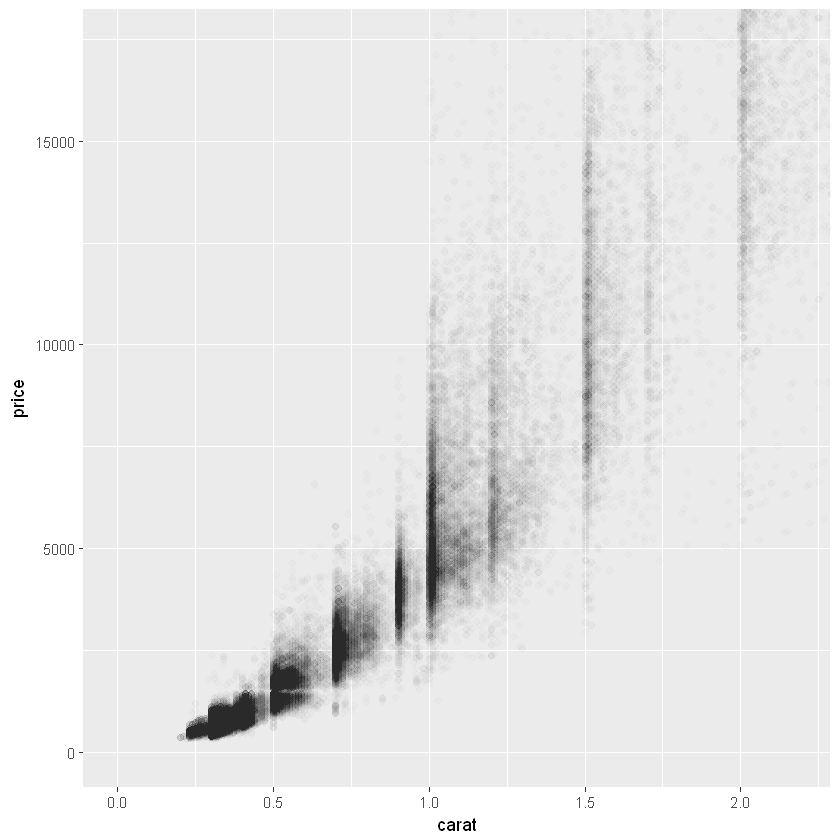

In [92]:
# Create a scatterplot of price vs carat
# and omit the top 1% of price and carat
# values.

ggplot(aes(x=carat, y= price), data=diamonds)+
    geom_point(alpha=0.01) +
    coord_cartesian(xlim = c(0, quantile(diamonds$carat, 0.99)),
                   ylim= c(0, quantile(diamonds$price, 0.99)))

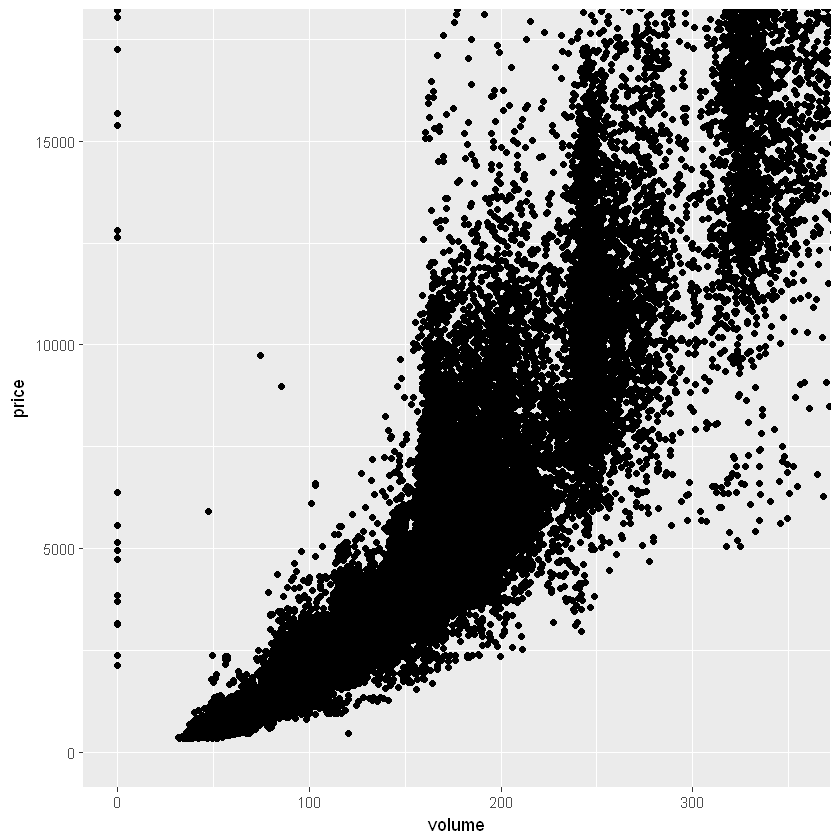

In [94]:
# Create a scatterplot of price vs. volume (x * y * z).
# This is a very rough approximation for a diamond's volume.

# Create a new variable for volume in the diamonds data frame.
# This will be useful in a later exercise.

diamonds$volume = diamonds$x *  diamonds$y *  diamonds$z

ggplot(aes(x=volume, y= price), data=diamonds )+
    geom_point() +
    coord_cartesian(xlim = c(0, quantile(diamonds$volume, 0.99)),
                   ylim= c(0, quantile(diamonds$price, 0.99)))

## specifying alpha is sometimes not helpful in locating outlier    
## We can see there are quite a few outliers, zero volume w decent price

In [95]:
length(diamonds[diamonds$volume==0,])

## Alternate

# You can find out how many diamonds have 0 volume by using 
# count(diamonds$volume == 0).The count() function comes with the plyr package.

# Note: If you ran the count function from plyr, you need to run this command 
# in R to unload the plyr package.
# detach("package:plyr", unload=TRUE)
# The plyr package will conflict with the dplyr package in later exercises

[1] 11

In [96]:
## Corelation b/n price and volume
# exclude volume=0 and volume >=800

t = diamonds[diamonds$volume !=0 & diamonds$volume < 800,]

with(t, cor.test(price, volume, method='pearson'))


	Pearson's product-moment correlation

data:  price and volume
t = 559.19, df = 53915, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9222944 0.9247772
sample estimates:
      cor 
0.9235455 


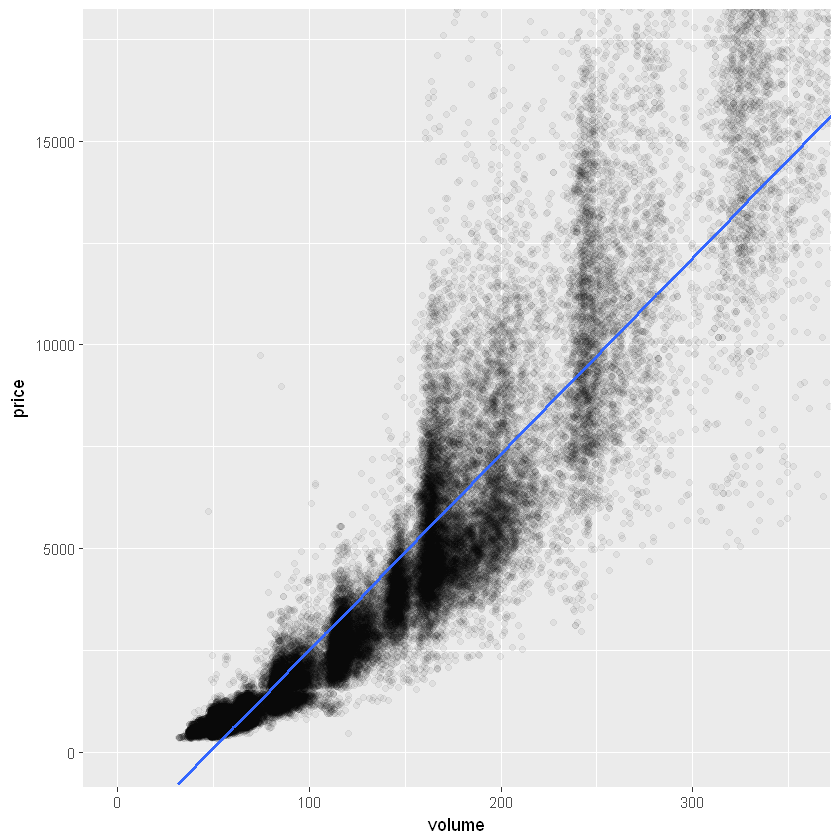

In [100]:
# Subset the data to exclude diamonds with a volume
# greater than or equal to 800. Also, exclude diamonds
# with a volume of 0. Adjust the transparency of the
# points and add a linear model to the plot. (See the
# Instructor Notes or look up the documentation of
# geom_smooth() for more details about smoothers.)

ggplot(aes(x=volume, y= price), data=t )+
    geom_point(alpha=.05) +
    coord_cartesian(xlim = c(0, quantile(diamonds$volume, 0.99)),
                   ylim= c(0, quantile(diamonds$price, 0.99))) +
    geom_smooth(data=t, method='lm')


In [101]:
# Use the function dplyr package
# to create a new data frame containing
# info on diamonds by clarity.

# Name the data frame diamondsByClarity

# The data frame should contain the following
# variables in this order.

#       (1) mean_price
#       (2) median_price
#       (3) min_price
#       (4) max_price
#       (5) n

# where n is the number of diamonds in each
# level of clarity.

library(dplyr)

## Here we need to group the data by clarity before we find
## the mean/median/min/max prices for a certain clarity level

diamondsByClarity = diamonds %>%
    group_by(clarity) %>%
    summarise(mean_price = mean(price),
                median_price = median(price),
                min_price = min(price),
                 max_price = max(price),
                 n = n()) %>%
    arrange(clarity)

head(diamondsByClarity)

clarity,mean_price,median_price,min_price,max_price,n
I1,3924.169,3344,345,18531,741
SI2,5063.029,4072,326,18804,9194
SI1,3996.001,2822,326,18818,13065
VS2,3924.989,2054,334,18823,12258
VS1,3839.455,2005,327,18795,8171
VVS2,3283.737,1311,336,18768,5066


clarity,mean_price
I1,3924.169
SI2,5063.029
SI1,3996.001
VS2,3924.989
VS1,3839.455
VVS2,3283.737
VVS1,2523.115
IF,2864.839


color,mean_price
D,3169.954
E,3076.752
F,3724.886
G,3999.136
H,4486.669
I,5091.875


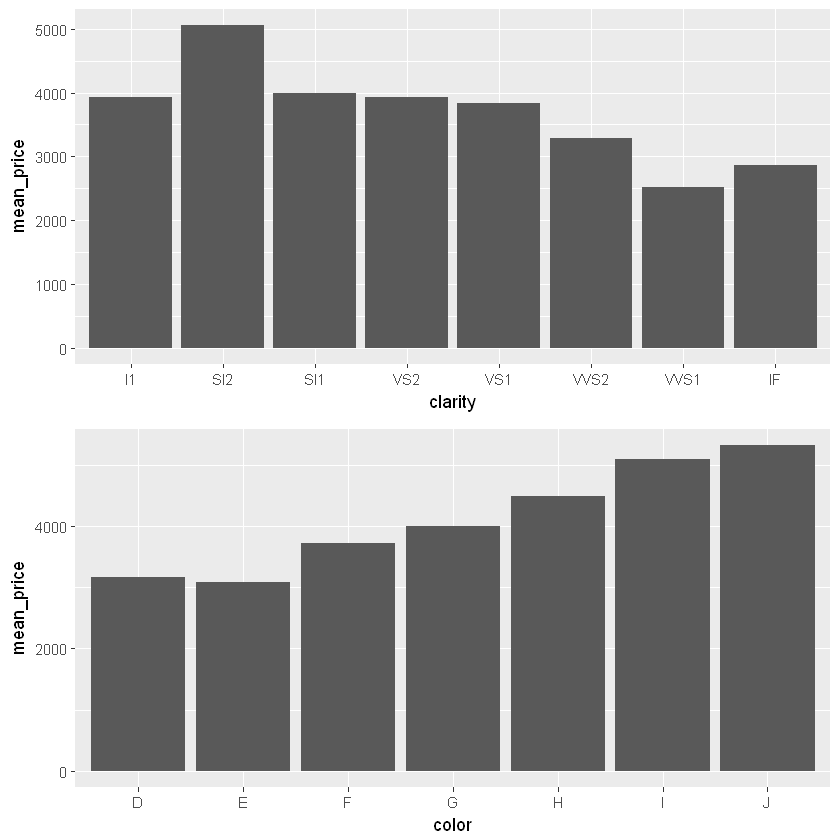

In [127]:
# We’ve created summary data frames with the mean price
# by clarity and color. You can run the code in R to
# verify what data is in the variables diamonds_mp_by_clarity
# and diamonds_mp_by_color.

# Your task is to write additional code to create two bar plots
# on one output image using the grid.arrange() function from the package
# gridExtra.

diamonds_by_clarity <- group_by(diamonds, clarity)
diamonds_mp_by_clarity <- summarise(diamonds_by_clarity, mean_price = mean(price))

diamonds_by_color <- group_by(diamonds, color)
diamonds_mp_by_color <- summarise(diamonds_by_color, mean_price = mean(price))


diamonds_mp_by_clarity
head(diamonds_mp_by_color)

# q1 = ggplot(aes(x=clarity), data = diamonds) +
#         geom_bar()

# q2 = ggplot(aes(x=color), data = diamonds) +
#         geom_bar()

q1 = ggplot(aes(x=clarity, y=mean_price), data = diamonds_mp_by_clarity) +
        geom_bar(stat="identity") #bcoz geom_bar has stat='count' by default

q2 = ggplot(aes(x=color, y=mean_price), data = diamonds_mp_by_color) +
        geom_bar(stat="identity") #bcoz geom_bar has stat='count' by default



library(gridExtra)
grid.arrange(q1,q2,ncol=1)


In [109]:
data(mpg)
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


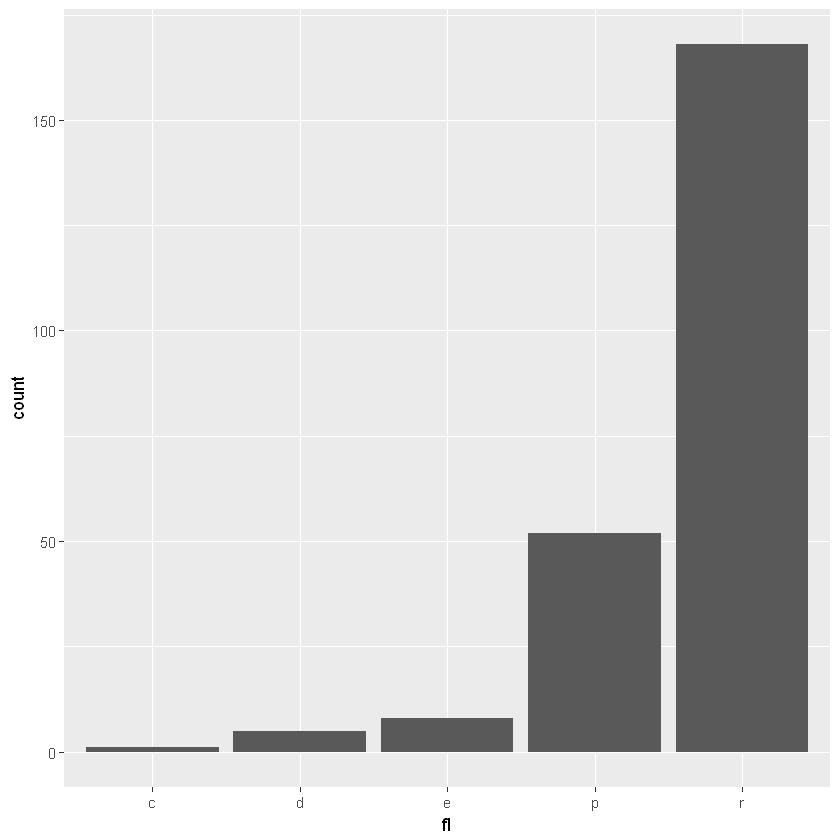

In [128]:
ggplot(mpg, aes(fl)) +
    geom_bar()